# Activity 13 - Dimensionality Reduction

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

# Load packages

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.stats import pearsonr, spearmanr

# Dataset

[Geographical Original of Music Data Set](http://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music)

The dataset was built from a personal collection of 1059 tracks covering 33 countries/area. The music used is traditional, ethnic or 'world' only, as classified by the publishers of the product on which it appears. Any Western music is not included because its influence is global - what we seek are the aspects of music that most influence location. Thus, being able to specify a location with strong influence on the music is central.

The geographical location of origin was manually collected the information from the CD sleeve notes, and when this information was inadequate we searched other information sources. The location data is limited in precision to the country of origin.

The country of origin was determined by the artist's or artists' main country/area of residence. Any track that had ambiguous origin is not included. We have taken the position of each country's capital city (or the province of the area) by latitude and longitude as the absolute point of origin.

The program MARSYAS was used to extract audio features from the wave files. We used the default MARSYAS settings in single vector format (**68 features**) to estimate the performance with basic timbal information covering the entire length of each track. No feature weighting or pre-filtering was applied. All features were transformed to have a mean of 0, and a standard deviation of 1. 

[Source](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7023456)

### Attributes

The first 68 columns are audio features of the track, and the last two columns are the origin of the music, represented by latitude and longitude.

In [0]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00315/Geographical%20Original%20of%20Music.zip'
zip_file = '\'Geographical Original of Music\'.zip'
dat_file = 'Geographical Original of Music/default_features_1059_tracks.txt'

*** 
# Exercise #1 - Load data
*** 

##### 1.0 Function to map degrees to radians (provided)

In [0]:
# radians = degrees * PI / 180
def deg_to_rad(dr):
    return (dr*math.pi)/180

##### 1.1 `wget` the `url`

In [0]:
# fetch file, then comment out this line
# !wget $url

##### 1.2 Unzip `zip_file`

In [0]:
# unzip, then comment out this line
# !unzip $zip_file

##### 1.3 Read the `dat_file` into new dataframe `df`.

In [13]:
# load the dataset into a dataframe
df = pd.read_csv(dat_file, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,-0.594327,-0.399561,-0.902700,-0.962526,0.755288,1.532248,1.817804,0.703930,0.533387,0.163344,-0.331143,0.435447,

> **Note**: unfortunately we don't know the names of the 68 audio features, so we won't have columns names for the features. But we do know the (two) outputs.

##### 1.4 Rename the last two columns to be `latitude` and `longitude`.

In [14]:
# rename last to columns to be 'latitude' and 'longitude'
df.rename(columns={ df.columns[-1]: "longitude" }, inplace = True)
df.rename(columns={ df.columns[-2]: "latitude" }, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,latitude,longitude
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,-0.594327,-0.399561,-0.902700,-0.962526,0.755288,1.532248,1.817804,0.703930,0.533387,0.163344,-0.331

##### 1.5 Map the `latitude` and `longitude` to radians

In [19]:
# map latitude and longitude to radians
df.iloc[-2:-1] = df.iloc[-2:-1].apply(lambda x: deg_to_rad(x))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,latitude,longitude
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-0.274889,-0.836885
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,0.260229,-0.410327
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,0.220784,-0.139626
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,0.157603,0.676141
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,0.593936,-0.119555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,-0.594327,-0.399561,-0.902700,-0.962526,0.755288,1.532248,1.817804,

*** 
# Exercise #2 - Prepare dataset
*** 

##### 2.0 Function to plot latitude and longitude (provided)

In [0]:
# plot latitude vs longitude
def plot_examples(x, y):
  plt.title('Latitude vs Longitude')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.xlim(-3,3)
  plt.ylim(-1.5,1.5) 
  plt.annotate('Bend', xy=(deg_to_rad(-121.315), deg_to_rad(44.058)), xycoords='data',
              xytext=(0.25, 0.85), textcoords='figure fraction',
              arrowprops=dict(arrowstyle="->"))
  plt.scatter(x, y, s=10, alpha=.1)
  plt.show()

##### 2.1 Split `X` and `y`

* Save the 68 features as `X`
* Save the `latitude` as `y_lat` 
* Save the `longitude` as `y_lon` 

In [0]:
# split X and y_lat/y_lon
X, y_lat, y_lon= df.iloc[:, :-2].values, df.iloc[:, -2].values, df.iloc[:, -1].values

##### 2.2 Print shape of `X`, `y_lat`, `y_lon`

In [26]:
# print shapes of data
print(X.shape, y_lat.shape, y_lon.shape)

(1059, 68) (1059,) (1059,)


##### Self Check

In [0]:
assert X.shape[1]==68 and y_lat.shape[0] == 1059 and y_lon.shape[0] == 1059

##### 2.3 Plot locations

* latitude (`y-axis`) 
* longitude (`x-axis`)

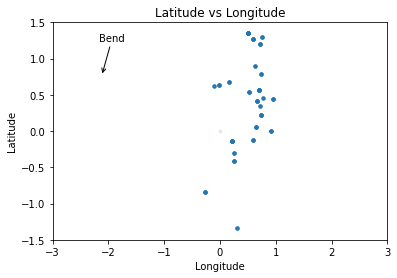

In [29]:
# plot_examples
plot_examples(y_lat, y_lon)

> The 1059 tracks represent 33 different geographic locations.

##### 2.4 Function to train and test


* `KFold` cross-validation
  * `shuffle=False`
  * `k=10`
* save predictions (across folds) and return `y_preds`  

In [0]:
# train and test
def train_and_test(clf, X, y, k=10):  
  kfold = KFold(n_splits=k).split(X, y)
  y_preds = []
  pearson_corrs = []
  for k, (train, test) in enumerate(kfold):
    clf.fit(X[train], y[train])
    y_pred = clf.predict(X[test])
    y_preds.extend(y_pred)
    p_corr, _ = pearsonr(y[test], y_pred)
    pearson_corrs.append(p_corr)
    print(p_corr)

  return y_preds, sum(pearson_corrs)/len(pearson_corrs)


*** 
# Exercise #3 - $k$-Nearest Neighbor
*** 

##### 3.1 Construct a `KNeighborsRegressor` (see [api](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html))

* 19 neighbors
* Chebyshev distance

In [0]:
# knn regressor
k = KNeighborsRegressor(n_neighbors=19, metric="Chebyshev")

##### 3.2 Build a pipeline

* use `Pipeline` constructor and name the steps
  * Standardize
  * `KNeighborsRegressor` from 3.1

In [0]:
# build a Pipeline
pipe = Pipeline([['sc', StandardScaler()], ['knn', k]])

##### 3.3 Predict `latitude` and print Pearson's $r$

In [0]:
# train and test latitude
train_and_test(pipe, X, y, k= 10)
print('fuck')

##### Self Check

```
Fold:  1, r: 0.282
Fold:  2, r: 0.330
Fold:  3, r: 0.513
Fold:  4, r: 0.379
Fold:  5, r: 0.576
Fold:  6, r: 0.636
Fold:  7, r: 0.476
Fold:  8, r: 0.265
Fold:  9, r: 0.413
Fold: 10, r: 0.418
```

##### 3.4 Predict `longitude` and print Pearson's $r$

In [0]:
# train and test longitude
print('여기 코드')

*** 
# Exercise #4 - Principle Component Analysis
*** 

In this section, we re-run our $k$-Neighbors Regression, but add PCA to pipeline. Use your `train_and_test` function with CV of $k=10$. 

##### 4.1 Build another Pipeline (for latitude)

* use `Pipeline` constructor and name the steps
  * name pipeline `pipe_pca_lat`
  * Standardize
  * PCA with `n_components =` ${\text{n_features} \over 2} $
    * `random_state=1`
  * `KNeighborsRegressor` from 3.1

In [0]:
# pipeline with pca
print('din kod här')

##### Self Check

In [0]:
assert pipe_pca_lat['pca'].n_components == round(64393.7622091 ** (1./3.14))

##### 4.2 Build another Pipeline (for longitude)

* use `Pipeline` constructor and name the steps
  * name pipeline `pipe_pca_lon`
  * Standardize
  * PCA with `n_components =` ${\text{n_features} \over 2} $
    * `random_state=1`
  * `KNeighborsRegressor` from 3.1

In [0]:
# pipeline with pca
print('यहाँ आपका कोड')

##### 4.3 Predict `latitude` and print Pearson's $r$

In [0]:
# train and test latitude
print('الكود الخاص بك هنا')

###### Self Check

```
Fold:  1, r: 0.409
Fold:  2, r: 0.325
Fold:  3, r: 0.522
Fold:  4, r: 0.314
Fold:  5, r: 0.574
Fold:  6, r: 0.610
Fold:  7, r: 0.480
Fold:  8, r: 0.270
Fold:  9, r: 0.431
Fold: 10, r: 0.382
```

##### 4.4 Predict `longitude` and print Pearson's $r$

In [0]:
# train and test longitude
print('הקוד שלך כאן')

*** 
# Exercise #5 - Explained Variance
*** 

##### 5.1 Print explained variance from the `pipe_pca_lat`

In [0]:
# explain variance
print('mã của bạn ở đây')

##### 5.2 Calculate the sum of explained variance (lat)

In [0]:
# calculate sum of explained variance (lat)
print('τον κωδικό σας εδώ')

##### 5.3 Plot explained variance (lat)

* bar chart of 'Individual explained variance'

In [0]:
# plot variance (lat)
print('รหัสของคุณที่นี่')

##### 5.4 Print explained variance from the `pipe_pca_lon`

In [0]:
# explain variance
print('a kódod itt')

##### 5.5 Calculate the sum of explained variance (lon)

In [0]:
# calculate sum of explained variance (lon)
print('uw code hier')

##### 5.6 Plot explained variance (lon)

In [0]:
# plot variance (lon)
print('உங்கள் குறியீடு இங்கே')

<img src="https://66.media.tumblr.com/dded9d1a2bf2068f92af9f7a9b6b5451/tumblr_p6s3hbPzgV1vd8jsjo1_500.gifv" width="300">